**Part I: Using PCA to project 2-D data onto its principal axes**

In [ ]:
from cProfile import label
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
# create dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)
X

array([[-7.79842558e-01, -7.25035362e-01],
       [-1.71097070e+00, -5.64228380e-02],
       [ 4.89591649e-01,  1.85568480e-01],
       [-2.97122622e+00, -1.67515888e+00],
       [ 5.69236811e-01,  9.00239014e-01],
       [ 9.69916161e-01,  3.66038690e-01],
       [ 3.72329343e-01, -1.31659722e+00],
       [ 3.13291389e+00,  1.97374029e+00],
       [ 1.57697817e+00,  1.49525938e+00],
       [ 2.10410746e+00,  4.56393273e-01],
       [-2.37531795e+00, -2.04426174e+00],
       [ 4.66901868e-01, -8.32352558e-01],
       [ 8.71231068e-01,  7.73420205e-01],
       [ 1.78452439e+00,  1.70892989e+00],
       [ 1.12999928e+00,  6.37231499e-01],
       [ 2.58134249e-01,  1.75760187e+00],
       [ 4.53736035e-01, -5.34292484e-01],
       [-8.87208561e-01, -1.71831447e+00],
       [ 4.46952492e-01, -1.29730430e+00],
       [ 2.15569151e+00,  1.84849172e+00],
       [-1.31299097e+00, -8.81189775e-01],
       [ 3.17385058e-01, -5.14359599e-03],
       [ 2.78232697e+00,  1.56765052e+00],
       [ 3.

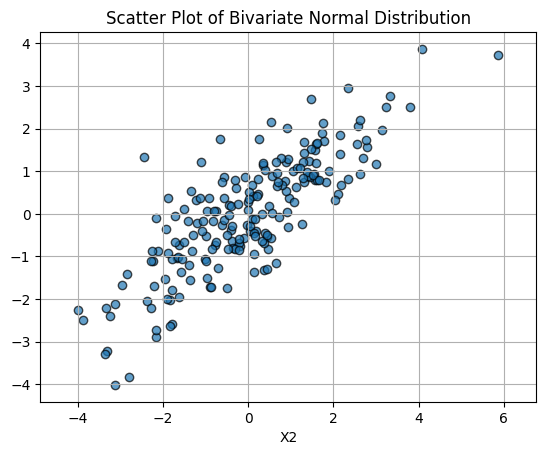

In [12]:
# visualize the relationship between the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.xlabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

In [13]:
# perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [14]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [15]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

In [16]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])
projection_pc1

array([-1.0617152 , -1.37340572,  0.49856211, -3.36772678,  1.00615406,
        0.98669923, -0.52912477,  3.68023218,  2.16511245,  1.9301144 ,
       -3.13161279, -0.15343099,  1.1633431 ,  2.46058023,  1.28088434,
        1.29702817,  0.02198647, -1.76458463, -0.45873664,  2.83784981,
       -1.57601828,  0.24504046,  3.15299138,  0.99061124, -0.74525776,
       -0.69462877,  1.44964214, -2.19586062,  1.79029848, -0.70116386,
        1.02216109,  2.3550398 , -1.72652345,  0.16027931, -0.77650927,
       -0.76187935,  0.08662997,  5.60024482, -0.18783786, -0.20882319,
        0.4714574 , -3.15965604,  1.72343709, -1.95287786,  1.13471571,
       -0.20106299,  1.49724021,  0.8279533 , -0.63072937, -0.01243755,
        3.02005534,  0.72674005,  0.34706687, -4.02715571, -0.55052591,
        4.09770482, -0.11270478,  0.41277079,  0.06657638, -2.43583876,
       -1.6952692 , -3.00498054, -1.23917375,  2.11180429, -0.21607868,
        3.31216013,  2.27180029,  1.97361553,  1.67069386, -1.74

In [17]:
X_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
X_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

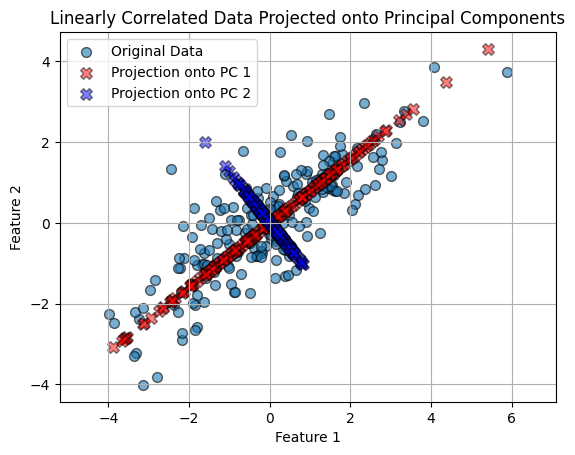

In [39]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)
plt.scatter(X_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(X_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('Equal')
plt.show()

**Part II. PCA for feature space dimensionality reduction**

In [40]:
# load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# initialize PCA model and reduce the iris data set dimentionality to two componenets
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [44]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

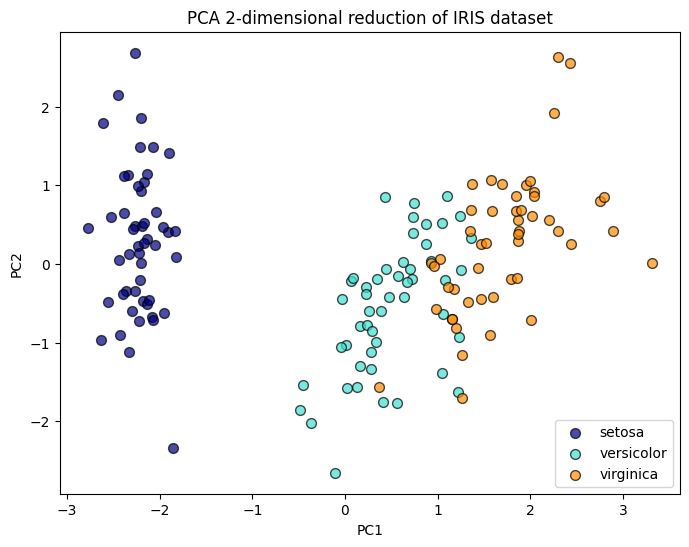

In [56]:
# plot the pca-transformed data in 2D
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 1
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k', alpha=0.7, lw=lw, label=target_name)
plt.title('PCA 2-dimensional reduction of IRIS dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [57]:
# percentage of original feature space variance
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

In [58]:
# Reinitialize the PCA model without reducing the dimension
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

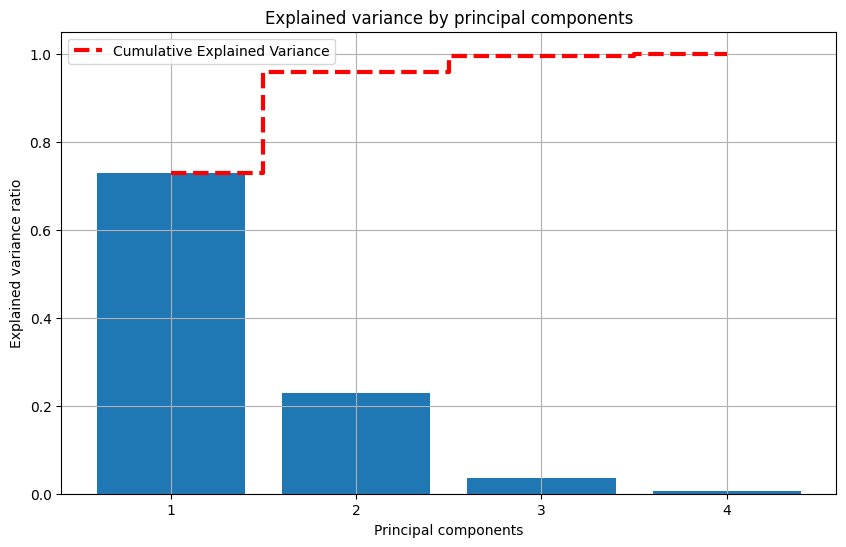

In [74]:
# plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio)
plt.ylabel('Explained variance ratio')
plt.xlabel("Principal components")
plt.title("Explained variance by principal components")
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3, color='red', label='Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()